In [298]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

import xarray as xr
import os
import math as m

In [18]:
directory = "E:/Climate/t6/"
file_list = np.array ([file for file in os.listdir(directory) if file.endswith('.nc')])
file_list

array(['ERA5_t2m_1_2022_C_model_grid.nc',
       'tas_Amon_NorESM2-MM_ssp585_r1i1p1f1_185001-210012_r360x180_remap.nc',
       'tas_Amon_TaiESM1_ssp585_r1i1p1f1_185001-210012_r360x180_remap.nc',
       'tas_Amon_UKESM1-0-LL_ssp585_r1i1p1f2_185001-210012_r360x180_remap.nc',
       'tas_Amon_AWI-CM-1-1-MR_ssp585_r1i1p1f1_185001-210012_r360x180_remap.nc',
       'tas_Amon_EC-Earth3_ssp585_r1i1p1f1_185001-210012_r360x180_remap.nc',
       'tas_Amon_ACCESS-ESM1-5_ssp585_r1i1p1f1_185001-210012_r360x180_remap.nc',
       'ERA5_t2m_1_2022_C_model_grid_6190.nc',
       'ERA5_t2m_1_2022_C_model_grid_6190_clim.nc',
       'ERA5_t2m_1_2022_C_model_grid_year.nc',
       'ERA5_t2m_1_2022_C_model_grid_year_anom.nc',
       'ERA5_t2m_1_2022_C_model_grid_year_anom_box.nc',
       'ERA5_t2m_1_2022_C_model_grid_year_anom_box_ymean.nc',
       'tas_Amon_ACCESS-ESM1-5_ssp585_r1i1p1f1_185001-210012_r360x180_remap_C.nc',
       'tas_Amon_ACCESS-ESM1-5_ssp585_r1i1p1f1_185001-210012_r360x180_remap_C_regular.nc

In [316]:
# Aggregating files
file_dict = {}
model_list = []
for file in file_list:
    dataset = xr.open_dataset(os.path.join(directory, file), decode_times=False)
    file_dict[file] = dataset
    if 'ERA5_t2m_1_2022_C' in file:
         continue
    model_list.append(file)
model_list
# dict[file_list[0]]

['E:/Climate/t6/timmean_fldcor_tas_Amon_ACCESS-ESM1-5_ssp585_r1i1p1f1_185001-210012_r360x180_remap_C_regular_axis_year_anom_box_ymean.nc',
 'E:/Climate/t6/timmean_fldcor_tas_Amon_AWI-CM-1-1-MR_ssp585_r1i1p1f1_185001-210012_r360x180_remap_C_regular_axis_year_anom_box_ymean.nc',
 'E:/Climate/t6/timmean_fldcor_tas_Amon_EC-Earth3_ssp585_r1i1p1f1_185001-210012_r360x180_remap_C_regular_axis_year_anom_box_ymean.nc',
 'E:/Climate/t6/timmean_fldcor_tas_Amon_NorESM2-MM_ssp585_r1i1p1f1_185001-210012_r360x180_remap_C_regular_axis_year_anom_box_ymean.nc',
 'E:/Climate/t6/timmean_fldcor_tas_Amon_TaiESM1_ssp585_r1i1p1f1_185001-210012_r360x180_remap_C_regular_axis_year_anom_box_ymean.nc',
 'E:/Climate/t6/timmean_fldcor_tas_Amon_UKESM1-0-LL_ssp585_r1i1p1f2_185001-210012_r360x180_remap_C_regular_axis_year_anom_box_ymean.nc']

In [312]:
# CORRELATIONS
timcor = {}
timmean = {}
for file in model_list:
    if 'timcor' in file:
        timcor[file] = file_dict[file]
    if 'timmean' in file:
        timmean[file] = file_dict[file]['tas'][0][0]

{}

In [257]:
timcor['timcor_tas_Amon_UKESM1-0-LL_ssp585_r1i1p1f2_185001-210012_r360x180_remap_C_regular_axis_year_anom_box_ymean.nc']['lon']

<xarray.DataArray 'lon' (lon: 31)> Size: 248B
array([30., 31., 32., 33., 34., 35., 36., 37., 38., 39., 40., 41., 42., 43.,
       44., 45., 46., 47., 48., 49., 50., 51., 52., 53., 54., 55., 56., 57.,
       58., 59., 60.])
Coordinates:
  * lon      (lon) float64 248B 30.0 31.0 32.0 33.0 34.0 ... 57.0 58.0 59.0 60.0
Attributes:
    standard_name:  longitude
    long_name:      longitude
    units:          degrees_east
    axis:           X

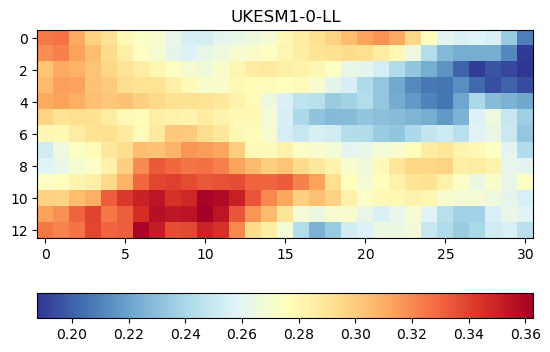

In [153]:
# Visualizing one timcor
file = 'timcor_tas_Amon_UKESM1-0-LL_ssp585_r1i1p1f2_185001-210012_r360x180_remap_C_regular_axis_year_anom_box_ymean.nc'
plt.title(file.split('_')[3], fontsize=12)
plt.imshow(timcor[file]['tas'][0][::-1], cmap='RdYlBu_r')

plt.colorbar(orientation='horizontal')
# plt.savefig("0.png")

In [276]:
def data_disp (keyword, stopword, data_dict, name_value, timestep, columns, n_lat, n_lon, pos_in_filename, title,
               scale_range, savefig, fig_name):

    #### Displayig 25 timcors (data_dict)
    if keyword == '' and stopword == '':
        data_list = np.array([file for file in data_dict.keys()])
    elif stopword == '':
        data_list = np.array([file for file in data_dict.keys() if keyword in file])
    else:
        data_list = np.array([file for file in data_dict.keys() if (keyword in file and not stopword in file)])
    
    n_subs = len(data_list)
    n_rows = n_subs // columns
    fig, ax = plt.subplots(n_rows, columns, figsize=(11.7, 8.3), layout='constrained')
    
    fig.suptitle (title, fontsize=14)

    for i in range(n_subs):
        print (data_list[i])
        row = i // columns
        column = i % columns

        name = data_list[i].split('_')[pos_in_filename]
        if timestep < 0:
            array = np.array (data_dict[data_list[i]][name_value][0])
        else:
            array = np.array (data_dict[data_list[i]][name_value][timestep])
        print (array.shape)
        print (ax.shape)
        if scale_range == 0:
            plotted = ax[row, column].imshow(array[::-1], cmap='RdYlBu_r')
        else:
            plotted = ax[row, column].imshow(array[::-1],  vmin=-scale_range, vmax=scale_range, cmap='RdYlBu_r')
        ax[row, column].set_title(name, fontsize=10)
        
        if n_lat*n_lon != 0:
            # Counting how to place ticks
            longitudes = np.array (data_dict['lon'], dtype='int')
            latitudes = np.array (data_dict['lat'][0:180]+0.5, dtype='int')
            lon_step = len(longitudes)//(n_lon-1)
            lat_step = m.ceil(len(latitudes)/(n_lat))

            ax[row, column].tick_params(length=2, labelsize=6)
            ax[row, column].set_xticks(np.arange(0, len(longitudes), lon_step))
            ax[row, column].set_xticklabels(list(str(lon) + 'E' for lon in longitudes[::lon_step]))
            ax[row, column].set_yticks(np.arange(0, len(latitudes), lat_step))
            ax[row, column].set_yticklabels(list(str(lat) + 'N' for lat in latitudes[-1::-lat_step]))
            ax[row, column].grid(color='black', linestyle='dashed', linewidth=0.5, alpha=0.2)

    cbar = fig.colorbar(plotted, ax=ax, location='bottom', anchor=(0.5, 0), shrink=0.4, extend='both', orientation='horizontal')

    plt.show()
    if (savefig):    fig.savefig(fig_name)

In [273]:
# Open 6 model outputs from my directory
i = 0
for file in file_dict.keys():
    if ('axis_year_anom' in file and not '_box' in file):
        print (file)
        i+=1
i

tas_Amon_ACCESS-ESM1-5_ssp585_r1i1p1f1_185001-210012_r360x180_remap_C_regular_axis_year_anom.nc
tas_Amon_AWI-CM-1-1-MR_ssp585_r1i1p1f1_185001-210012_r360x180_remap_C_regular_axis_year_anom.nc
tas_Amon_EC-Earth3_ssp585_r1i1p1f1_185001-210012_r360x180_remap_C_regular_axis_year_anom.nc
tas_Amon_NorESM2-MM_ssp585_r1i1p1f1_185001-210012_r360x180_remap_C_regular_axis_year_anom.nc
tas_Amon_TaiESM1_ssp585_r1i1p1f1_185001-210012_r360x180_remap_C_regular_axis_year_anom.nc
tas_Amon_UKESM1-0-LL_ssp585_r1i1p1f2_185001-210012_r360x180_remap_C_regular_axis_year_anom.nc


6

tas_Amon_ACCESS-ESM1-5_ssp585_r1i1p1f1_185001-210012_r360x180_remap_C_regular_axis_year_anom.nc
(180, 360)
(18, 2)
tas_Amon_ACCESS-ESM1-5_ssp585_r1i1p1f1_185001-210012_r360x180_remap_C_regular_axis_year_anom_box.nc
(13, 31)
(18, 2)
tas_Amon_ACCESS-ESM1-5_ssp585_r1i1p1f1_185001-210012_r360x180_remap_C_regular_axis_year_anom_box_ymean.nc
(13, 31)
(18, 2)
tas_Amon_AWI-CM-1-1-MR_ssp585_r1i1p1f1_185001-210012_r360x180_remap_C_regular_axis_year_anom.nc
(180, 360)
(18, 2)
tas_Amon_AWI-CM-1-1-MR_ssp585_r1i1p1f1_185001-210012_r360x180_remap_C_regular_axis_year_anom_box.nc
(13, 31)
(18, 2)
tas_Amon_AWI-CM-1-1-MR_ssp585_r1i1p1f1_185001-210012_r360x180_remap_C_regular_axis_year_anom_box_ymean.nc
(13, 31)
(18, 2)
tas_Amon_EC-Earth3_ssp585_r1i1p1f1_185001-210012_r360x180_remap_C_regular_axis_year_anom.nc
(180, 360)
(18, 2)
tas_Amon_EC-Earth3_ssp585_r1i1p1f1_185001-210012_r360x180_remap_C_regular_axis_year_anom_box.nc
(13, 31)
(18, 2)
tas_Amon_EC-Earth3_ssp585_r1i1p1f1_185001-210012_r360x180_remap_C_

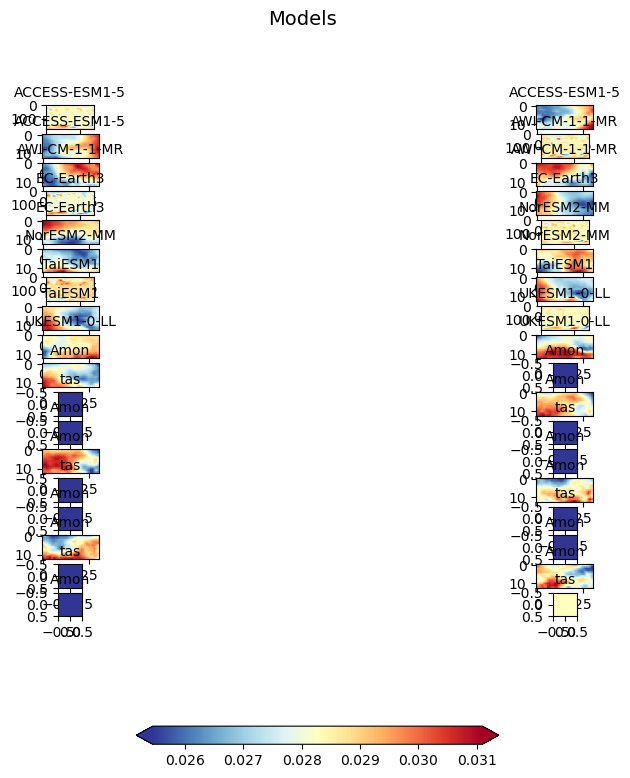

In [275]:
data_disp ('axis_year_anom', 'ERA', file_dict, 'tas', 0, 2, 3, 0, 2, "Models", 0, False, "example_fig.png")

In [253]:
# Open all timcors from directory
model_list = []
i = 0
for file in file_dict.keys():
    if ('timcor' in file):
        model_list.append(file)
        i+=1
i
model_list

['timcor_tas_Amon_ACCESS-ESM1-5_ssp585_r1i1p1f1_185001-210012_r360x180_remap_C_regular_axis_year_anom_box_ymean.nc',
 'timcor_tas_Amon_AWI-CM-1-1-MR_ssp585_r1i1p1f1_185001-210012_r360x180_remap_C_regular_axis_year_anom_box_ymean.nc',
 'timcor_tas_Amon_EC-Earth3_ssp585_r1i1p1f1_185001-210012_r360x180_remap_C_regular_axis_year_anom_box_ymean.nc',
 'timcor_tas_Amon_NorESM2-MM_ssp585_r1i1p1f1_185001-210012_r360x180_remap_C_regular_axis_year_anom_box_ymean.nc',
 'timcor_tas_Amon_TaiESM1_ssp585_r1i1p1f1_185001-210012_r360x180_remap_C_regular_axis_year_anom_box_ymean.nc',
 'timcor_tas_Amon_UKESM1-0-LL_ssp585_r1i1p1f2_185001-210012_r360x180_remap_C_regular_axis_year_anom_box_ymean.nc']

timcor_tas_Amon_ACCESS-ESM1-5_ssp585_r1i1p1f1_185001-210012_r360x180_remap_C_regular_axis_year_anom_box_ymean.nc
(13, 31)
(3, 2)
timcor_tas_Amon_AWI-CM-1-1-MR_ssp585_r1i1p1f1_185001-210012_r360x180_remap_C_regular_axis_year_anom_box_ymean.nc
(13, 31)
(3, 2)
timcor_tas_Amon_EC-Earth3_ssp585_r1i1p1f1_185001-210012_r360x180_remap_C_regular_axis_year_anom_box_ymean.nc
(13, 31)
(3, 2)
timcor_tas_Amon_NorESM2-MM_ssp585_r1i1p1f1_185001-210012_r360x180_remap_C_regular_axis_year_anom_box_ymean.nc
(13, 31)
(3, 2)
timcor_tas_Amon_TaiESM1_ssp585_r1i1p1f1_185001-210012_r360x180_remap_C_regular_axis_year_anom_box_ymean.nc
(13, 31)
(3, 2)
timcor_tas_Amon_UKESM1-0-LL_ssp585_r1i1p1f2_185001-210012_r360x180_remap_C_regular_axis_year_anom_box_ymean.nc
(13, 31)
(3, 2)


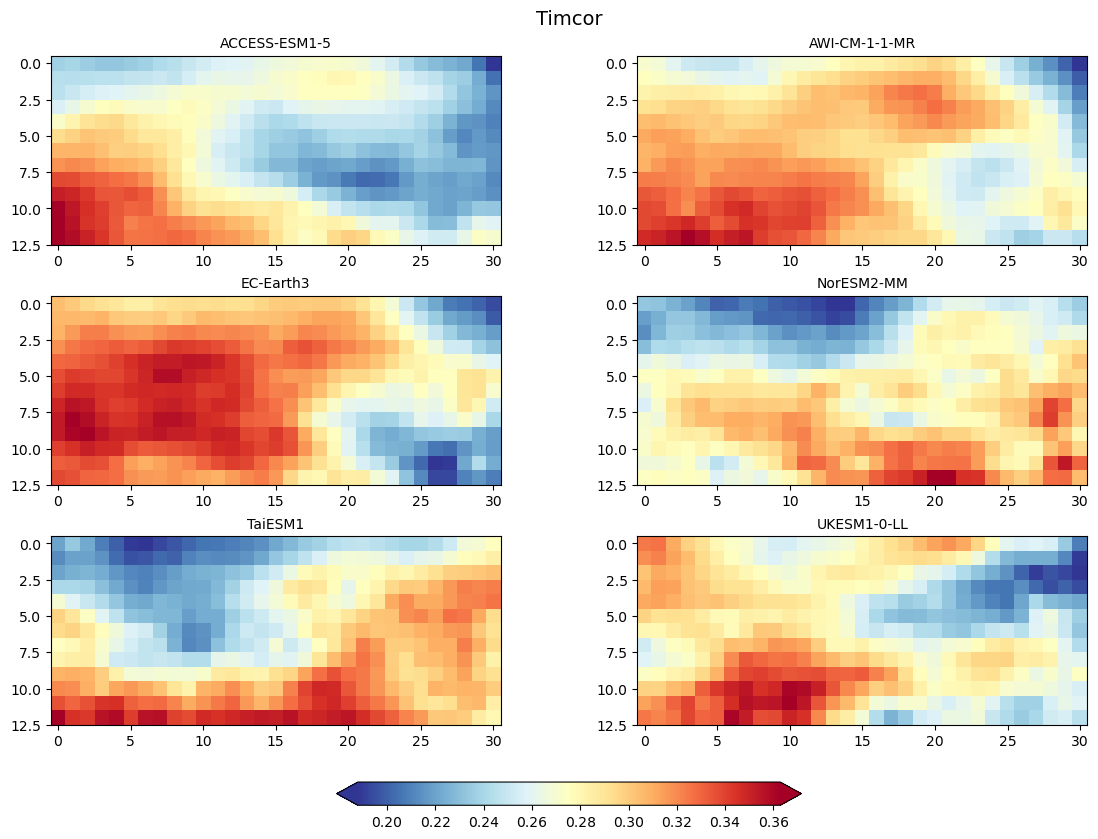

In [277]:
data_disp ('timcor', '', file_dict, 'tas', -1, 2, 3, 0, 3, "Timcor", 0, False, "timcor_6.png")

In [317]:
# -*- coding: utf-8 -*-
"""
Created on Sat Mar 16 20:30:31 2024

@author: Nikita
"""

import xarray as xr
import os


# Path to the directory containing the NetCDF files
directory_path = 'E:/Climate/t6/'

# Get a list of all NetCDF files in the directory
file_list = [os.path.join(directory_path, file) for file in os.listdir(directory_path) if 'timmean' in file]

# Create an empty dictionary
tas_values = {}

# Iterate through each file and extract the 'tas' variable values
for file in file_list:
    ds = xr.open_dataset(file, decode_times=False)
    tas_value = ds['tas'].item()  # Extracting the scalar value
    tas_values[os.path.basename(file.split('_')[4])] = tas_value  # Using the file name as the key

# Print the resulting dictionary
print(tas_values)

with open('output_t6.txt', 'w') as file:
    for key, value in tas_values.items():
        file.write(f'{key}: {value}\n')

{'ACCESS-ESM1-5': 0.09482488154189501, 'AWI-CM-1-1-MR': -0.056986709147888504, 'EC-Earth3': 0.043028008125346455, 'NorESM2-MM': 0.0001456064544923589, 'TaiESM1': -0.064473055503936, 'UKESM1-0-LL': 0.02827262950365976}


In [299]:
df = pd.DataFrame(timmean.items())

importance_counts = df['importance'].value_counts().reset_index()
importance_counts.columns = ['Importance', 'Frequency']

plt.figure(figsize=(14, 8))
sns.barplot(x='Frequency', y='Importance', data=importance_counts)
plt.title('Что важнее студентам географии ВШЭ?', fontsize = 20)
plt.xlabel('Частота выбора', fontsize = 16)
plt.ylabel('Предпочтения', fontsize = 16)
plt.show()

KeyError: 'importance'

In [314]:
timmean

{}